<a href="https://colab.research.google.com/github/Pendota-sukumar/Sukumar-Pendota/blob/main/Pyspark_Automated_Data_Pipeline_%26_viz_of_it.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas openpyxl matplotlib seaborn pyspark

**DEFINE FILE PATHS**

In [ ]:
import os

source_file_path = "/content/drive/MyDrive/Colab Notebooks/Source Data/financial data sp500 companies.csv"  # Change to your actual input file path
target_folder_path = "/content/drive/MyDrive/Colab Notebooks/Target Data"  # Change to your actual target folder


**Ensure target folder exists**

In [ ]:
os.makedirs(target_folder_path, exist_ok=True)


**Define final output file path inside the target folder**

In [ ]:
output_file_path = os.path.join(target_folder_path, "final_transformed_data.xlsx")
visualization_output_path = os.path.join(target_folder_path, "data_visualization.png")

**STEP 4: LOAD INPUT DATA USING PANDAS (EXTRACT)**

In [ ]:
import pandas as pd

# Load Excel file from Google Drive
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Source Data/financial data sp500 companies.csv")

In [ ]:
# Display first few rows
print("✅ First 5 rows of Input Data:")
print(df.head())

✅ First 5 rows of Input Data:
   Unnamed: 0        date firm Ticker  Research Development  \
0           0  2021-09-30   3M    MMM           482000000.0   
1           1  2021-06-30   3M    MMM           514000000.0   
2           2  2021-03-31   3M    MMM           520000000.0   
3           3  2020-12-31   3M    MMM           449000000.0   
4           4  2021-09-30   3M    MMM           482000000.0   

   Income Before Tax    Net Income  Selling General Administrative  \
0       1.761000e+09  1.434000e+09                    1.739000e+09   
1       1.940000e+09  1.524000e+09                    1.666000e+09   
2       1.946000e+09  1.624000e+09                    1.720000e+09   
3       1.706000e+09  1.389000e+09                    1.814000e+09   
4       1.761000e+09  1.434000e+09                    1.739000e+09   

   Gross Profit          Ebit  Operating Income  Interest Expense  \
0  4.089000e+09  1.868000e+09      1.868000e+09      -117000000.0   
1  4.231000e+09  2.051000e+09   

**Initialize Spark session**

In [ ]:
# Ensure PySpark is installed
!pip install pyspark

# Import necessary PySpark modules
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.appName("DataPipeline").getOrCreate()



**Convert Pandas DataFrame to PySpark DataFrame**

In [ ]:
spark_df = spark.createDataFrame(df)


**Remove missing values**

In [ ]:
spark_df = spark_df.dropna()

**Convert Date column to datetime (if applicable)**

In [ ]:
if 'Date' in df.columns:
    spark_df = spark_df.withColumn("Date", col("Date").cast("date"))


**Filter for firms where "Net Income" > 1,000,000**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, regexp_replace

# Initialize Spark Session
spark = SparkSession.builder.appName("FixDataFrame").getOrCreate()

# Convert pandas DataFrame to PySpark DataFrame
df_spark = spark.createDataFrame(df)

# Remove commas from "Net Income" (if present)
df_spark = df_spark.withColumn("Net Income", regexp_replace(col("Net Income"), ",", ""))

# Convert column to double type
df_spark = df_spark.withColumn("Net Income", col("Net Income").cast("double"))

# Filter the DataFrame
df_filtered = df_spark.filter(col("Net Income") > 1000000)

# Show the filtered DataFrame
df_filtered.show()


+----------+----------+-------------------+------+--------------------+-----------------+----------+------------------------------+------------+-------+----------------+----------------+------------------+-------------+------------------------+---------------+------------------------------+------------------------------+--------------------------------------+
|Unnamed: 0|      date|               firm|Ticker|Research Development|Income Before Tax|Net Income|Selling General Administrative|Gross Profit|   Ebit|Operating Income|Interest Expense|Income Tax Expense|Total Revenue|Total Operating Expenses|Cost Of Revenue|Total Other Income Expense Net|Net Income From Continuing Ops|Net Income Applicable To Common Shares|
+----------+----------+-------------------+------+--------------------+-----------------+----------+------------------------------+------------+-------+----------------+----------------+------------------+-------------+------------------------+---------------+----------------

**Apply a 10% tax reduction where "Income Before Tax" is greater than 5,000,000**

In [ ]:
if "Income Before T" in df.columns:
    df_filtered = df_filtered.withColumn(
        "Adjusted Income Before Tax",
        when(col("Income Before T") > 5000000, col("Income Before T") * 0.9).otherwise(col("Income Before T"))
    )


**4️.Calculate Profit Margin (Net Income / Total Revenue)**

In [ ]:
if "Total Revenue" in df.columns and "Net Income" in df.columns:
    df_filtered = df_filtered.withColumn("Profit Margin", col("Net Income") / col("Total Revenue"))

**Show transformed data**

In [ ]:
print("✅ Transformed Data:")
df_filtered.show(5)

✅ Transformed Data:
+----------+----------+----+------+--------------------+-----------------+----------+------------------------------+------------+-------+----------------+----------------+------------------+-------------+------------------------+---------------+------------------------------+------------------------------+--------------------------------------+-------------------+
|Unnamed: 0|      date|firm|Ticker|Research Development|Income Before Tax|Net Income|Selling General Administrative|Gross Profit|   Ebit|Operating Income|Interest Expense|Income Tax Expense|Total Revenue|Total Operating Expenses|Cost Of Revenue|Total Other Income Expense Net|Net Income From Continuing Ops|Net Income Applicable To Common Shares|      Profit Margin|
+----------+----------+----+------+--------------------+-----------------+----------+------------------------------+------------+-------+----------------+----------------+------------------+-------------+------------------------+---------------+-

**💾 STEP 5: SAVE FILTERED DATA TO OUTPUT PATH (LOAD)**

In [ ]:
df_filtered.write.mode("overwrite").option("header", "true").csv("/content/drive/MyDrive/Colab Notebooks/Target Data")

print(f"✅ Processed Data saved to: {target_folder_path}")

✅ Processed Data saved to: /content/drive/MyDrive/Colab Notebooks/Target Data


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, regexp_replace
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline


In [ ]:
# Initialize Spark Session
spark = SparkSession.builder.appName("AutomatedPipeline").getOrCreate()

In [ ]:
import os

target_folder_path = "/content/drive/MyDrive/Colab Notebooks/Target Data"

# List all files in the target directory
files = os.listdir(target_folder_path)
print("📂 Files in Target Folder:", files)


📂 Files in Target Folder: ['part-00000-389ff18a-8326-4199-b466-644fe273c39c-c000.csv', '.part-00000-389ff18a-8326-4199-b466-644fe273c39c-c000.csv.crc', 'part-00001-389ff18a-8326-4199-b466-644fe273c39c-c000.csv', '.part-00001-389ff18a-8326-4199-b466-644fe273c39c-c000.csv.crc', '_SUCCESS', '._SUCCESS.crc']


In [ ]:
import pandas as pd
import os

target_folder_path = "/content/drive/MyDrive/Colab Notebooks/Target Data"

# List all valid CSV files (ignore .crc and _SUCCESS files)
csv_files = [f for f in os.listdir(target_folder_path) if f.endswith(".csv")]

# Read and combine all CSV files
df_list = [pd.read_csv(os.path.join(target_folder_path, f)) for f in csv_files]
df = pd.concat(df_list, ignore_index=True)

# Show data preview
print("✅ Merged Data Preview:")
print(df.head())


✅ Merged Data Preview:
   Unnamed: 0        date firm Ticker  Research Development  \
0           0  2021-09-30   3M    MMM           482000000.0   
1           1  2021-06-30   3M    MMM           514000000.0   
2           2  2021-03-31   3M    MMM           520000000.0   
3           3  2020-12-31   3M    MMM           449000000.0   
4           4  2021-09-30   3M    MMM           482000000.0   

   Income Before Tax    Net Income  Selling General Administrative  \
0       1.761000e+09  1.434000e+09                    1.739000e+09   
1       1.940000e+09  1.524000e+09                    1.666000e+09   
2       1.946000e+09  1.624000e+09                    1.720000e+09   
3       1.706000e+09  1.389000e+09                    1.814000e+09   
4       1.761000e+09  1.434000e+09                    1.739000e+09   

   Gross Profit          Ebit  Operating Income  Interest Expense  \
0  4.089000e+09  1.868000e+09      1.868000e+09      -117000000.0   
1  4.231000e+09  2.051000e+09      2.05

**Data Visualizations After Data Convertion**


**Revenue Trend Over Time**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


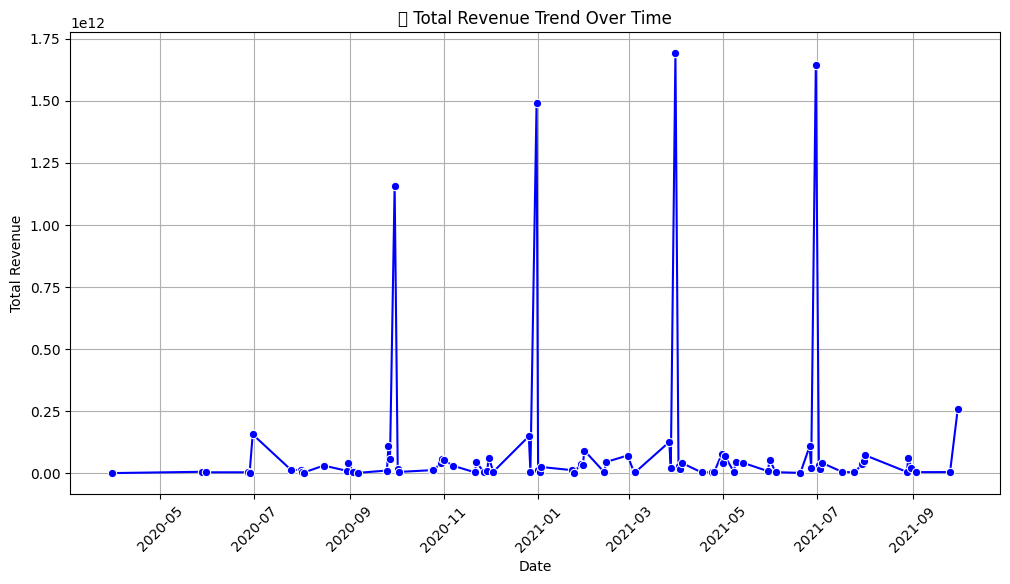

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' to datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Aggregate revenue by date
df_revenue_trend = df.groupby("date")["Total Revenue"].sum().reset_index()

# Plot revenue trend
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="Total Revenue", data=df_revenue_trend, marker="o", color="b")
plt.xticks(rotation=45)
plt.title("📈 Total Revenue Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()


**2. Top 10 Firms by Net Income**

<ipython-input-61-16ac3adef3c2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Net Income", y="firm", data=df_top_companies, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


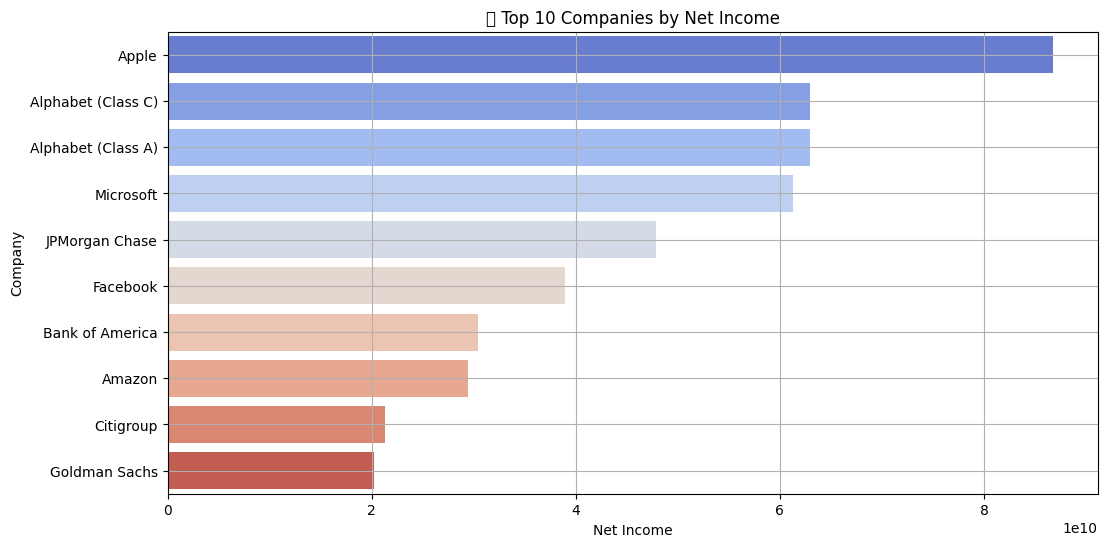

In [61]:
# Convert 'Net Income' to numeric (handle missing values)
df["Net Income"] = pd.to_numeric(df["Net Income"], errors="coerce")

# Get top 10 companies by Net Income
df_top_companies = df.groupby("firm")["Net Income"].sum().reset_index()
df_top_companies = df_top_companies.sort_values(by="Net Income", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Net Income", y="firm", data=df_top_companies, palette="coolwarm")
plt.title("🏆 Top 10 Companies by Net Income")
plt.xlabel("Net Income")
plt.ylabel("Company")
plt.grid(True)
plt.show()


**3. Profit Margin Distribution**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


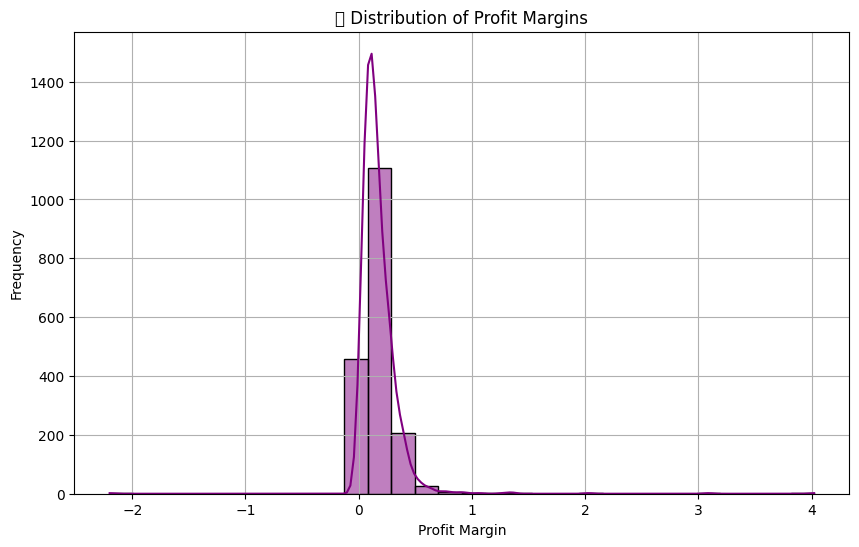

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Profit Margin"], bins=30, kde=True, color="purple")
plt.title("📊 Distribution of Profit Margins")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


**4. Automating the Process Every 30 Seconds**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


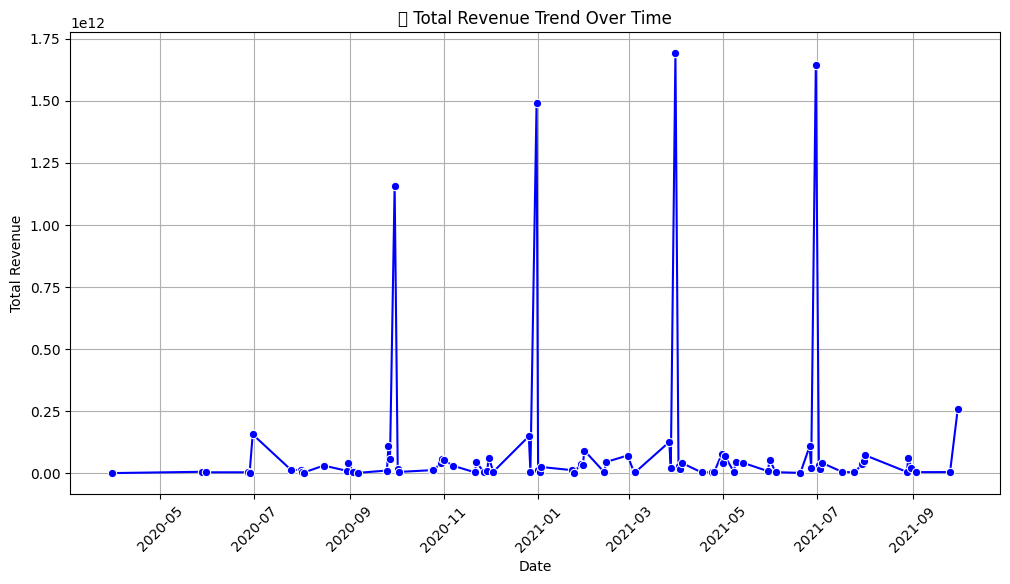

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


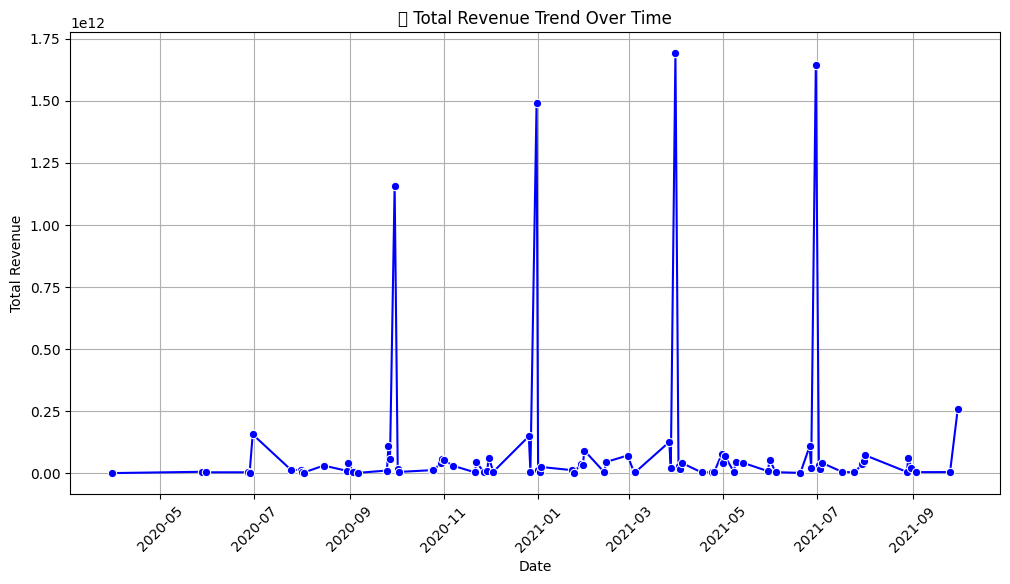

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


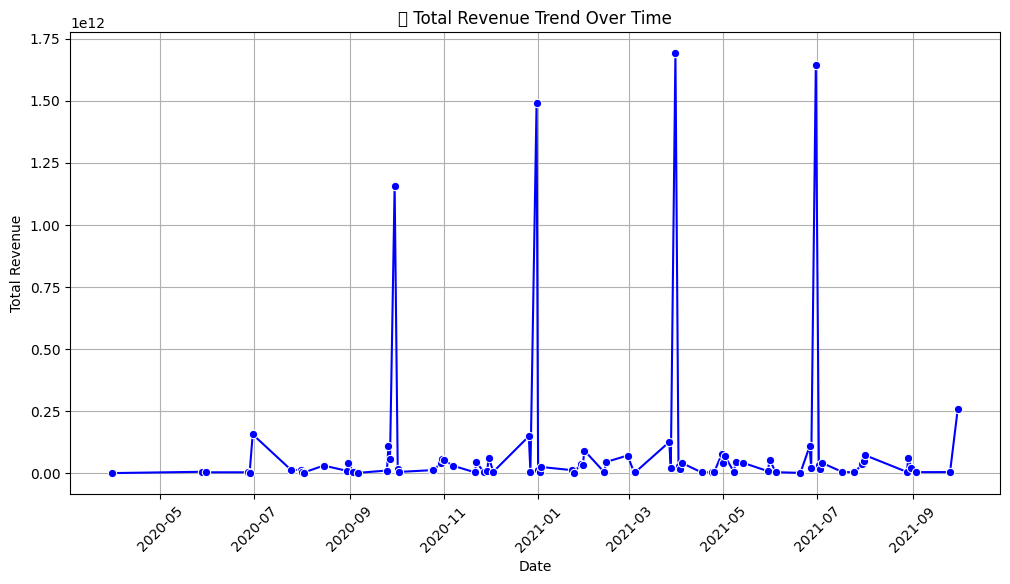

In [ ]:
import time

while True:
    # Refresh Data
    df_list = [pd.read_csv(os.path.join(target_folder_path, f)) for f in csv_files]
    df = pd.concat(df_list, ignore_index=True)

    # Ensure 'date' is in datetime format
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

    # Aggregate revenue by date
    df_revenue_trend = df.groupby("date")["Total Revenue"].sum().reset_index()

    # Plot revenue trend
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="date", y="Total Revenue", data=df_revenue_trend, marker="o", color="b")
    plt.xticks(rotation=45)
    plt.title("📈 Total Revenue Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Revenue")
    plt.grid(True)
    plt.show()

    # Wait 30 seconds before updating
    time.sleep(30)


** Summary
📈 Revenue Trend (Line Chart)

🏆 Top 10 Companies by Net Income (Bar Chart)

📊 Profit Margin Distribution (Histogram)

⏳ Automated Refresh Every 30 Seconds**